In [23]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir(module_path)
os.getcwd()

'/Users/phuong/Documents/projects'

# activating package

In [42]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook

In [25]:
from mlop_beta.dataset_calling import load_data
from mlop_beta.data_explorer import discovery
from mlop_beta.feature_engineer import ft_engineer
from mlop_beta.classification import model_list, models_comparer
from mlop_beta.classification import create_model, tune_model
from mlop_beta.classification import classification_eval

# data load

In [26]:
dt = load_data()

2022-07-05 18:11:17,602 - INFO     - data loading
...


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


# EDA

In [27]:
discovery(data=dt, feature=dt.columns, label='default')

'EDA WITH TALE IS DONE'

# feature engineering

In [28]:
x_train, x_test, y_train, y_test = ft_engineer(data=dt, label='default',
                                               cat_var=[], features_to_drop=[],
                                               transform=True)


X train: (16800, 23)
y train: (16800,)
X test: (7200, 23)
y test: (7200,)


# model development

## spot check

In [29]:
mod_list = model_list()
res, nam_model = models_comparer(list_of_model=mod_list, x=x_train, y=y_train)

Logistic: 0.716154 (0.019521)
RidgeClassifier: 0.714189 (0.019035)
LDA: 0.714346 (0.018769)
QDA: 0.721138 (0.015747)
SGDC: 0.702472 (0.021907)
GNB: 0.733574 (0.019416)
SVC: 0.704632 (0.022597)
KNN: 0.700774 (0.022153)
DT: 0.612367 (0.012256)
ADBoost: 0.774721 (0.015020)
GBBoost: 0.779359 (0.014771)
XGBoost: 0.759382 (0.015013)
RanForest: 0.760940 (0.017880)
ExTree: 0.751164 (0.014371)


pip install jupyter_contrib_nbextensions

jupyter contrib nbextension install --user


pip install jupyter_nbextensions_configurator


jupyter nbextensions_configurator enable --user

## selecting model

In [36]:
selected_mod = create_model(model_name='LogisticRegression', x=x_train, y=y_train)

,AUC
0,0.742084
1,0.672771
2,0.724415
3,0.736688
4,0.719276
5,0.715222
6,0.701829
7,0.733086
8,0.716258
9,0.699909


In [34]:
selected_mod

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## model tuning

In [39]:
tuned_lr = tune_model(model_name='LogisticRegression', x_feat=x_train, y_target=y_train)

[I 2022-07-05 18:35:04,251] A new study created in memory with name: no-name-e6341db5-c0bc-4f25-b498-95d24d8a99ee
[I 2022-07-05 18:35:07,148] Trial 0 finished with value: 0.7192329687224818 and parameters: {'penalty': 'l2', 'C': 82.32875502665424}. Best is trial 0 with value: 0.7192329687224818.
[I 2022-07-05 18:35:09,891] Trial 1 finished with value: 0.7191558841051104 and parameters: {'penalty': 'l2', 'C': 48.135340624027585}. Best is trial 1 with value: 0.7191558841051104.
[I 2022-07-05 18:35:23,498] Trial 2 finished with value: 0.7201398901979775 and parameters: {'penalty': 'l1', 'C': 54.150561141811956}. Best is trial 1 with value: 0.7191558841051104.
[I 2022-07-05 18:35:33,941] Trial 3 finished with value: 0.720088902532477 and parameters: {'penalty': 'l1', 'C': 32.02164929294611}. Best is trial 1 with value: 0.7191558841051104.
[I 2022-07-05 18:35:43,652] Trial 4 finished with value: 0.7201671138863625 and parameters: {'penalty': 'l1', 'C': 78.78332651434677}. Best is trial 1 wi

[I 2022-07-05 18:38:25,815] Trial 41 finished with value: 0.7182529123922448 and parameters: {'penalty': 'l1', 'C': 1.8360714136696323}. Best is trial 25 with value: 0.7086105569371839.
[I 2022-07-05 18:38:35,599] Trial 42 finished with value: 0.7197252443164077 and parameters: {'penalty': 'l1', 'C': 7.916536299819854}. Best is trial 25 with value: 0.7086105569371839.
[I 2022-07-05 18:38:37,777] Trial 43 finished with value: 0.7159146604130201 and parameters: {'penalty': 'l2', 'C': 0.7706181617667884}. Best is trial 25 with value: 0.7086105569371839.
[I 2022-07-05 18:38:49,002] Trial 44 finished with value: 0.7199168453932849 and parameters: {'penalty': 'l1', 'C': 13.507211522915329}. Best is trial 25 with value: 0.7086105569371839.
[I 2022-07-05 18:38:51,461] Trial 45 finished with value: 0.7181497112969938 and parameters: {'penalty': 'l2', 'C': 8.606975101700804}. Best is trial 25 with value: 0.7086105569371839.
[I 2022-07-05 18:38:53,801] Trial 46 finished with value: 0.718037503619

[I 2022-07-05 18:41:01,144] Trial 83 finished with value: 0.7185124613728651 and parameters: {'penalty': 'l2', 'C': 13.832856166581495}. Best is trial 79 with value: 0.7064753520325986.
[I 2022-07-05 18:41:03,115] Trial 84 finished with value: 0.715550453821278 and parameters: {'penalty': 'l2', 'C': 0.5221038989168683}. Best is trial 79 with value: 0.7064753520325986.
[I 2022-07-05 18:41:04,717] Trial 85 finished with value: 0.7140348769163094 and parameters: {'penalty': 'l2', 'C': 0.2052698817340828}. Best is trial 79 with value: 0.7064753520325986.
[I 2022-07-05 18:41:07,173] Trial 86 finished with value: 0.7184796789265346 and parameters: {'penalty': 'l2', 'C': 11.196588657809468}. Best is trial 79 with value: 0.7064753520325986.
[I 2022-07-05 18:41:09,607] Trial 87 finished with value: 0.7175064199580918 and parameters: {'penalty': 'l2', 'C': 3.552732896733974}. Best is trial 79 with value: 0.7064753520325986.
[I 2022-07-05 18:41:12,208] Trial 88 finished with value: 0.718083595007

The configuration of tuned model:
LogisticRegression(C=0.035495278016228655, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [40]:
tuned_lr

LogisticRegression(C=0.035495278016228655, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# model inference

<IPython.core.display.Javascript object>


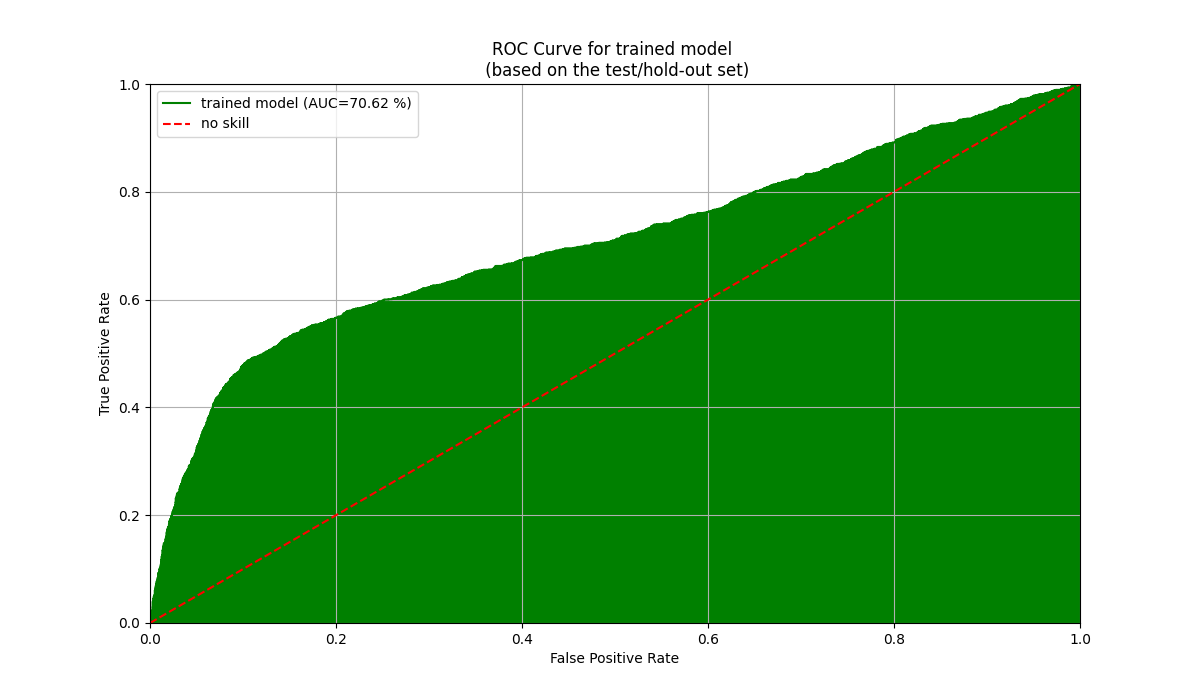

<IPython.core.display.Javascript object>


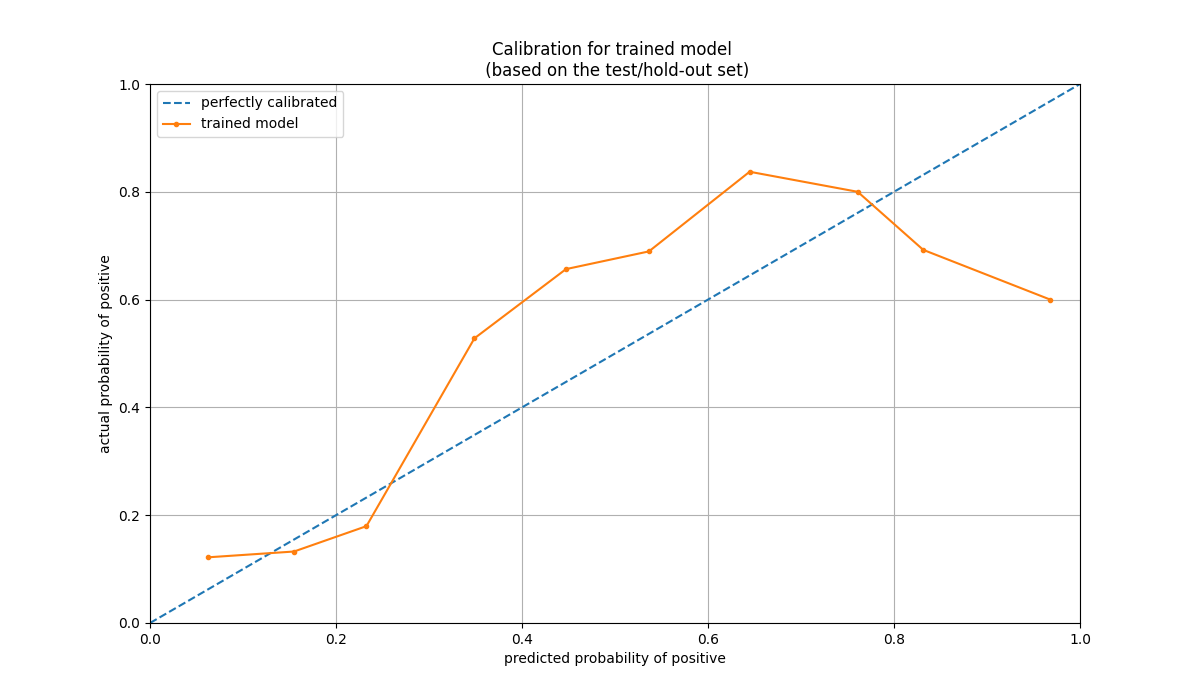

(0.7062134623006708,
 array([0.12182203, 0.13262343, 0.17967245, 0.52815534, 0.65653495,
        0.68944099, 0.8372093 , 0.8       , 0.69230769, 0.6       ]),
 array([0.0620443 , 0.15486245, 0.23272716, 0.34884325, 0.44727304,
        0.53648732, 0.64474787, 0.76095454, 0.83142888, 0.96800871]))

In [43]:
classification_eval(xtest=x_test, ytest=y_test,trainedModel=tuned_lr)

In [55]:
import pickle
filename='model.pkl'
pickle.dump(tuned_lr, open(filename, 'wb'))

In [56]:
# Import libraries
import numpy as np
from flask import Flask, request, jsonify
import pickle
app = Flask(__name__)
# Load the model
model = pickle.load(open('model.pkl','rb'))
@app.route('/api',methods=['POST'])
def predict():
    # Get the data from the POST request.
    data = request.get_json(force=True)
    # Make prediction using model loaded from disk as per the data.
    prediction = model.predict([[np.array(data['exp'])]])
    # Take the first value of prediction
    output = prediction[0]
    return jsonify(output)
if __name__ == '__main__':
    app.run(port=5000, debug=True)

SystemExit: 1